Užduotis 1
1.1. Viename grafike pavaizduoti naujų COVID atvejų Lietuvoje dinamiką laike (incidence time series) tokiose
amžiaus grupėse: 0-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90+. Vaizdavimui naudoti slenkančius vidurkius
(konkrečiai dienai priskirti keturiolikos paskutinių dienų rodiklio vidurkį). Laiko ašyje rodyti lietuviškus mėnesių
pavadinimus. Pateikti legendą (informacinę dėžutę) paaiškinančią grupių spalvas/pavadinimus.


In [19]:
import pandas as pd
covid = pd.read_csv('Agreguoti_COVID19_atvejai_ir_mirtys.csv')
covid.head()

,municipality_name,date,sex,age_gr,incidence,infection_1,infection_2,infection_3,infection_4,deaths_all,deaths_cov1,deaths_cov2,deaths_cov3,object_id
0,Marijampolės sav.,2/1/2020 12:00:00 AM,Moteris,100-109,0,0,0,0,0,1,0,0,0,1
1,Alytaus m. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,0,0,0,0,1,0,0,0,2
2,Tauragės r. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,0,0,0,0,1,0,0,0,3
3,Kalvarijos sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,0,0,0,0,1,0,0,0,4
4,Kelmės r. sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,0,0,0,0,1,0,0,0,5


In [20]:
covid.drop(columns=['infection_1', 'infection_2', 'infection_3', 'infection_4', 'deaths_cov1', 'deaths_cov2', 'deaths_cov3'], inplace=True)
covid.head()

,municipality_name,date,sex,age_gr,incidence,deaths_all,object_id
0,Marijampolės sav.,2/1/2020 12:00:00 AM,Moteris,100-109,0,1,1
1,Alytaus m. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,1,2
2,Tauragės r. sav.,2/1/2020 12:00:00 AM,Moteris,60-69,0,1,3
3,Kalvarijos sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,1,4
4,Kelmės r. sav.,2/1/2020 12:00:00 AM,Moteris,70-79,0,1,5


In [21]:
covid['date'] = pd.to_datetime(covid['date'])
# covid.head()
# Change min and max age to one age group
def merge_age_groups(age):
    if age in ['0-9', '10-19', '20-29']:
        return '0-29'
    if age in ['90-99', '100-109', '110-119']:
        return '90+'
    else:
        return age

covid['age_gr'] = covid['age_gr'].apply(merge_age_groups)

grouped=covid.groupby(['date', 'age_gr']).sum('incidence')
grouped.drop(columns=['object_id', 'deaths_all'], inplace=True)
grouped.head()

C:\Users\Laptop\AppData\Local\Temp\ipykernel_16352\1922625632.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid['date'] = pd.to_datetime(covid['date'])


incidence
date       age_gr           
2020-02-01 0-29            0
           30-39           0
           40-49           0
           50-59           0
           60-69           0

In [22]:
pivoted = grouped.reset_index().pivot(index='date', columns='age_gr', values='incidence').fillna(0)
pivoted.drop(columns=['Nenustatyta'], inplace=True)
rolling = pivoted.rolling(window=14).mean()
january = rolling.loc['2021-01']
january.head()

age_gr,0-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
date,,,,,,,,
2021-01-01,341.928571,412.785714,421.428571,508.428571,508.928571,195.285714,115.357143,57.071429
2021-01-02,329.000000,397.857143,405.928571,483.357143,483.857143,187.000000,113.428571,54.357143
2021-01-03,324.071429,390.000000,398.071429,476.071429,477.642857,183.500000,110.642857,54.285714
2021-01-04,324.000000,385.571429,392.071429,471.857143,470.357143,184.928571,111.285714,56.285714
2021-01-05,316.214286,376.642857,375.785714,455.714286,452.571429,180.500000,107.714286,54.071429


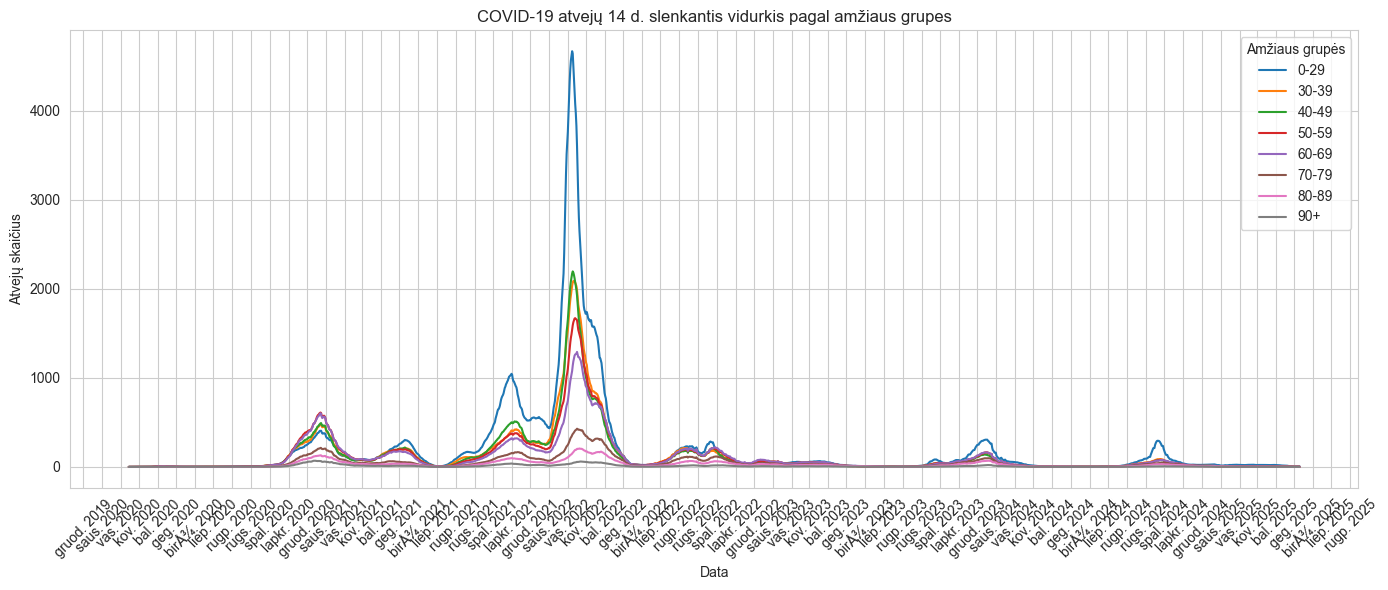

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import locale

# Try to set Lithuanian locale
try:
    locale.setlocale(locale.LC_TIME, 'lt_LT.UTF-8')
except locale.Error:
    locale.setlocale(locale.LC_TIME, '')

plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

for col in rolling.columns:
    plt.plot(rolling.index, rolling[col], label=col)

plt.title('COVID-19 atvejų 14 d. slenkantis vidurkis pagal amžiaus grupes')
plt.xlabel('Data')
plt.ylabel('Atvejų skaičius')
plt.legend(title='Amžiaus grupės')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


1.2. Toks pats grafikas kaip 1.1, tačiau rodiklį normalizuokite grupės dydžiui, laikydami, kad visų grupių dydis
vienodas (pvz., 200000 arba 100%). Amžiaus grupių populiacijų dydžius rasite čia:
https://osp.stat.gov.lt/ ➝ Visi rodikliai ➝ Rodiklių duomenų bazė ➝ …

In [ ]:
# Load sheet 2 (sheet index starts at 0)
pop_df = pd.read_excel('amziaus_grupes.xlsx', sheet_name=1)
pop_df.head(8)

,Age_group,Population
0,0-29,859002
1,30-39,382619
2,40-49,374566
3,50-59,424640
4,60-69,369020
5,70-79,242075
6,80-89,208732
7,90+,22755


In [16]:
#how many new cases per 100000 people of this age group
equal_pop = 100000  

# Make a copy to avoid modifying original
normalized = rolling.copy()

# Normalize each age group as if all had equal population

for group in normalized.columns:
    actual_pop = pop_df.loc[pop_df['Age_group'] == group, 'Population']
    normalized[group] = (normalized[group] / actual_pop.values[0]) * equal_pop

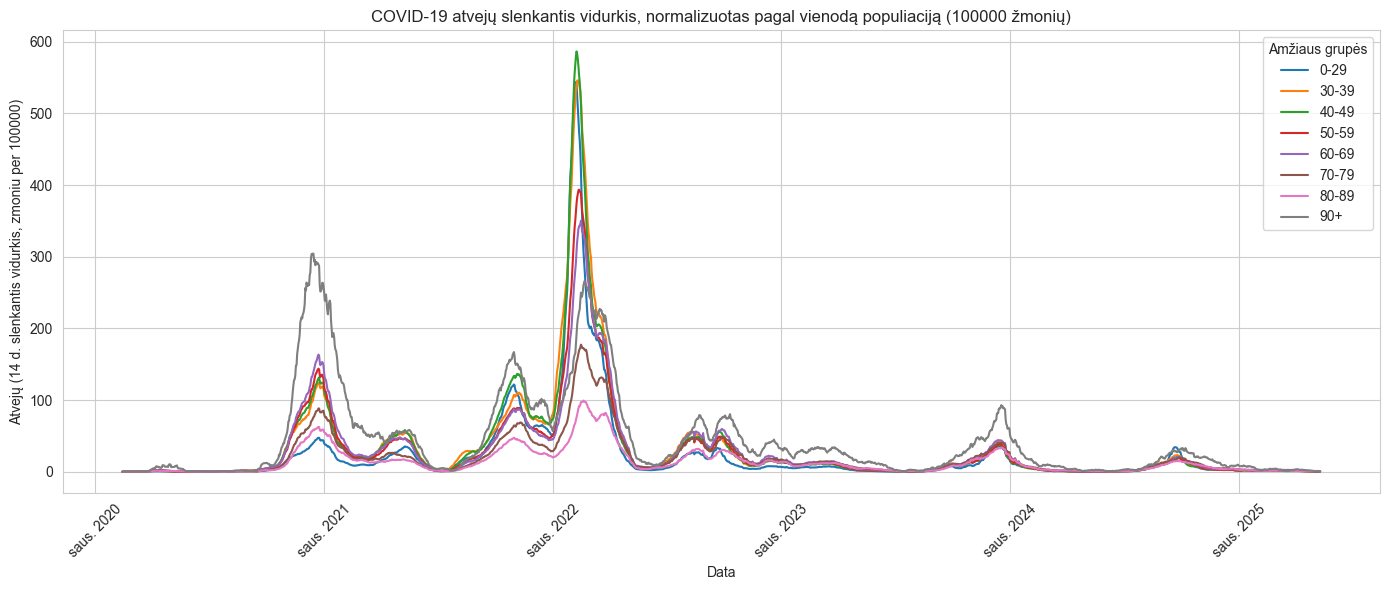

In [ ]:
# Plotting
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

for column in normalized.columns:
    plt.plot(normalized.index, normalized[column], label=column)

plt.title('COVID-19 atvejų slenkantis vidurkis, normalizuotas pagal vienodą populiaciją (100000 žmonių)')
plt.xlabel('Data')
plt.ylabel('Atvejų (14 d. slenkantis vidurkis, zmoniu per 100000)')
plt.legend(title='Amžiaus grupės')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

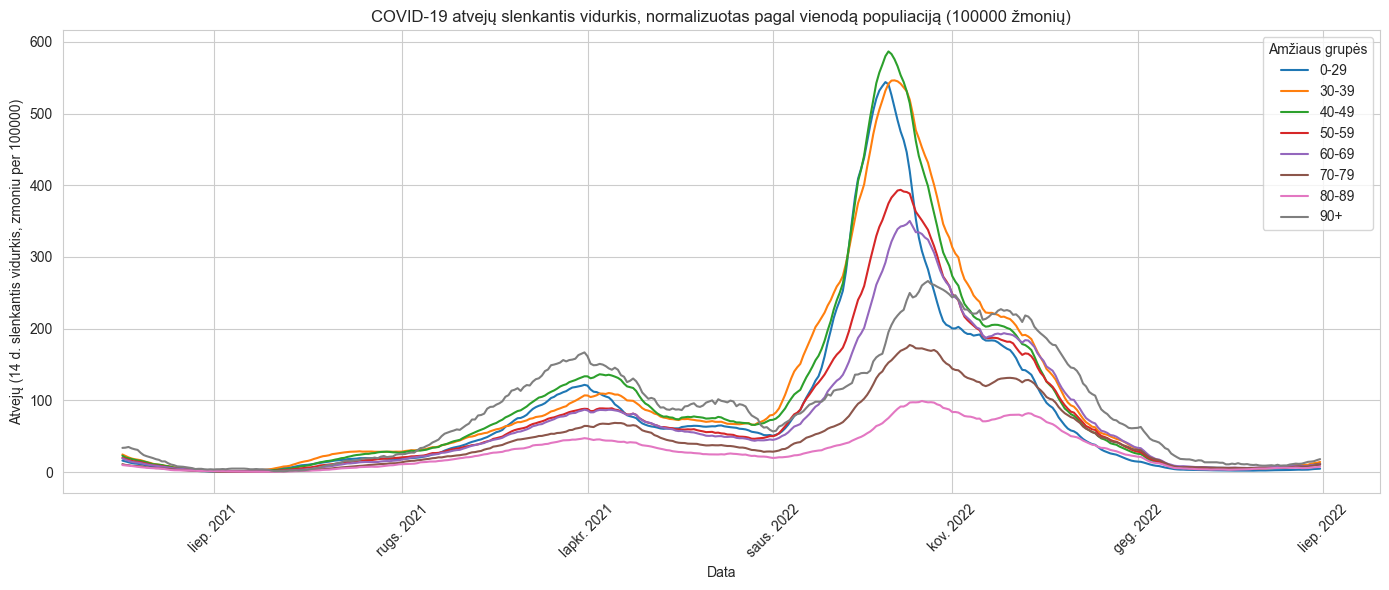

In [ ]:
# Filter the data for the specified date range
filtered = normalized.loc['2021-06-01':'2022-06-30']
# Plotting
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

for column in filtered.columns:
    plt.plot(filtered.index, filtered[column], label=column)

plt.title('COVID-19 atvejų slenkantis vidurkis, normalizuotas pagal vienodą populiaciją (100000 žmonių)')
plt.xlabel('Data')
plt.ylabel('Atvejų (14 d. slenkantis vidurkis, zmoniu per 100000)')
plt.legend(title='Amžiaus grupės')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Užduotis 2
2.1. Identifikuokite pandemijos 60 dienų intervalą,
kurio metu bendras mirtingumas (duomenų stulpelis
all_deaths) Lietuvoje buvo pats didžiausias. Padarykite
tai ne “iš akies”, o naudodamiesi objektyviu savo
sugalvotu optimizavimo algoritmu, surandančiu tokį
intervalą duomenyse.

2.2. Vizualizuokite Lietuvos savivaldybes pagal jų
bendro mirtingumo rangą padieniui 2.1 punkte surasto
laiko intervalo eigoje. Mirtingumas turi būti
normalizuotas savivaldybės gyventojų skaičiui (pvz.,
tenkantis 100,000 gyventojų). Dešimt didžiausių
savivaldybių nuspalvinkite gradiento spalva (kad
spalva/tonas intuityviai indikuotų dydį). Pateikiame
panašų pavyzdį iš kitur (dešinėje).

2.3. Tas pats, kaip 2.2, tačiau savivaldybes
padarykite maksimaliai demografiškai palyginamomis,
t.y., mirtingumo rodiklį normalizuoti ne tik gyventojų
skaičiui savivaldybėse, tačiau ir gyventojų skaičiui
visose amžiaus grupėse tose savivaldybėse. 

Užduotis 3
3.1. Nustebinkite mus jūsų pačių sugalvota mūsų duomenų vizualizacija, analize arba idėjiniu tyrimo aprašmu.
Duomenys gali būti ne vien iš COVID temos ar https://osp.stat.gov.lt/ svetainės, tačiau jie turi būti viešai prieinami.